# **1. Introduction**

This notebook is a programming assignment wherein we have built a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

This notebook focusses to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features

## 1.1 Data Preprocessing

In [1]:
#Let's import the required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
print('Packages have been imported ✓')

Packages have been imported ✓


In [2]:
#Import the dataset
df = pd.read_csv('/content/day.csv')

In [3]:
#Let's have a quick look at the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Let's see the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
#Verify whether dataset has any null value
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Shape of the dataset
df.shape

(730, 16)

In [7]:
#Let's see the summary of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Now, let's see the more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are few categorical variables like `season`, `weathersit`, ` mnth` and `weekday` in the dataset, before the model building these columns need to be encoded using the dummy variables

Let's first assign the correct lables before creating dummy variables

In [9]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
def season_lab(season):
  return season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

df[['season']] = df[['season']].apply(season_lab)

In [11]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
def weather_lab(weather):
  return weather.map({1:'clear',2:'cloudy',3:'rainy'})

df[['weathersit']] = df[['weathersit']].apply(weather_lab)

In [13]:
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
def month_lab(month):
  return month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(month_lab)

In [15]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [16]:
def week_lab(week):
  return week.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df[['weekday']] = df[['weekday']].apply(week_lab)

## **1.2 Univariate Analysis**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [18]:
#Listing out the numeric columns 
num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
num_cols = num_cols[4:]
print('List of numeric columns:',num_cols)

List of numeric columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [19]:
#Creating a plot function
def plots(num_cols):
  plt.figure(figsize=[25,25])
  for col in num_cols:
    a=num_cols.index(col)+1
    plt.subplot(3,3,a)
    sns.distplot(df[col])
  plt.show()

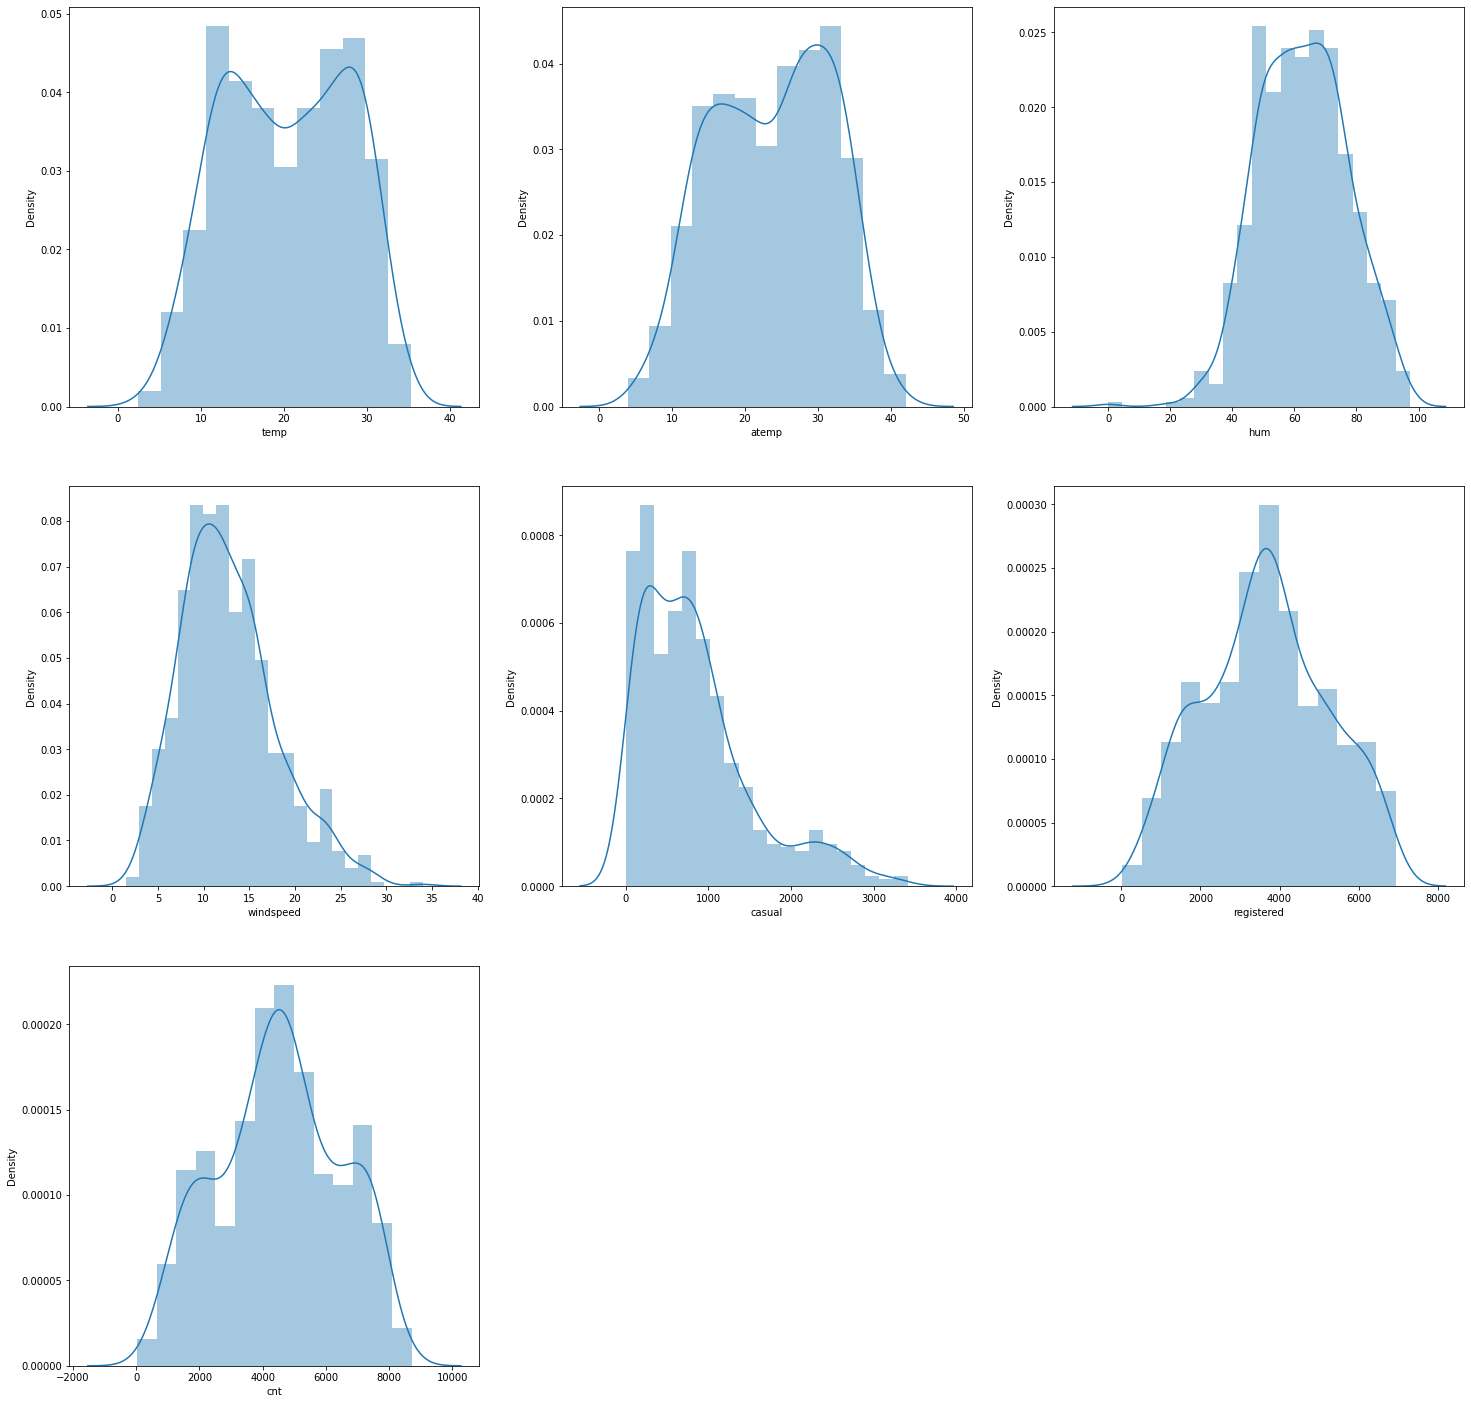

In [20]:
plots(num_cols)

### *Inferences:*
- The Wind speed, Humidity  follows the Normal distribution
- Distribution of Causal bike users is Positively Skewed


## **1.3 Bi-Variate Analysis**

In [21]:
#Listing out the columns with Object data types
obj_cols = df.select_dtypes(['object']).columns.tolist()
obj_cols = obj_cols+['yr','holiday','workingday']
print(len(obj_cols))

8


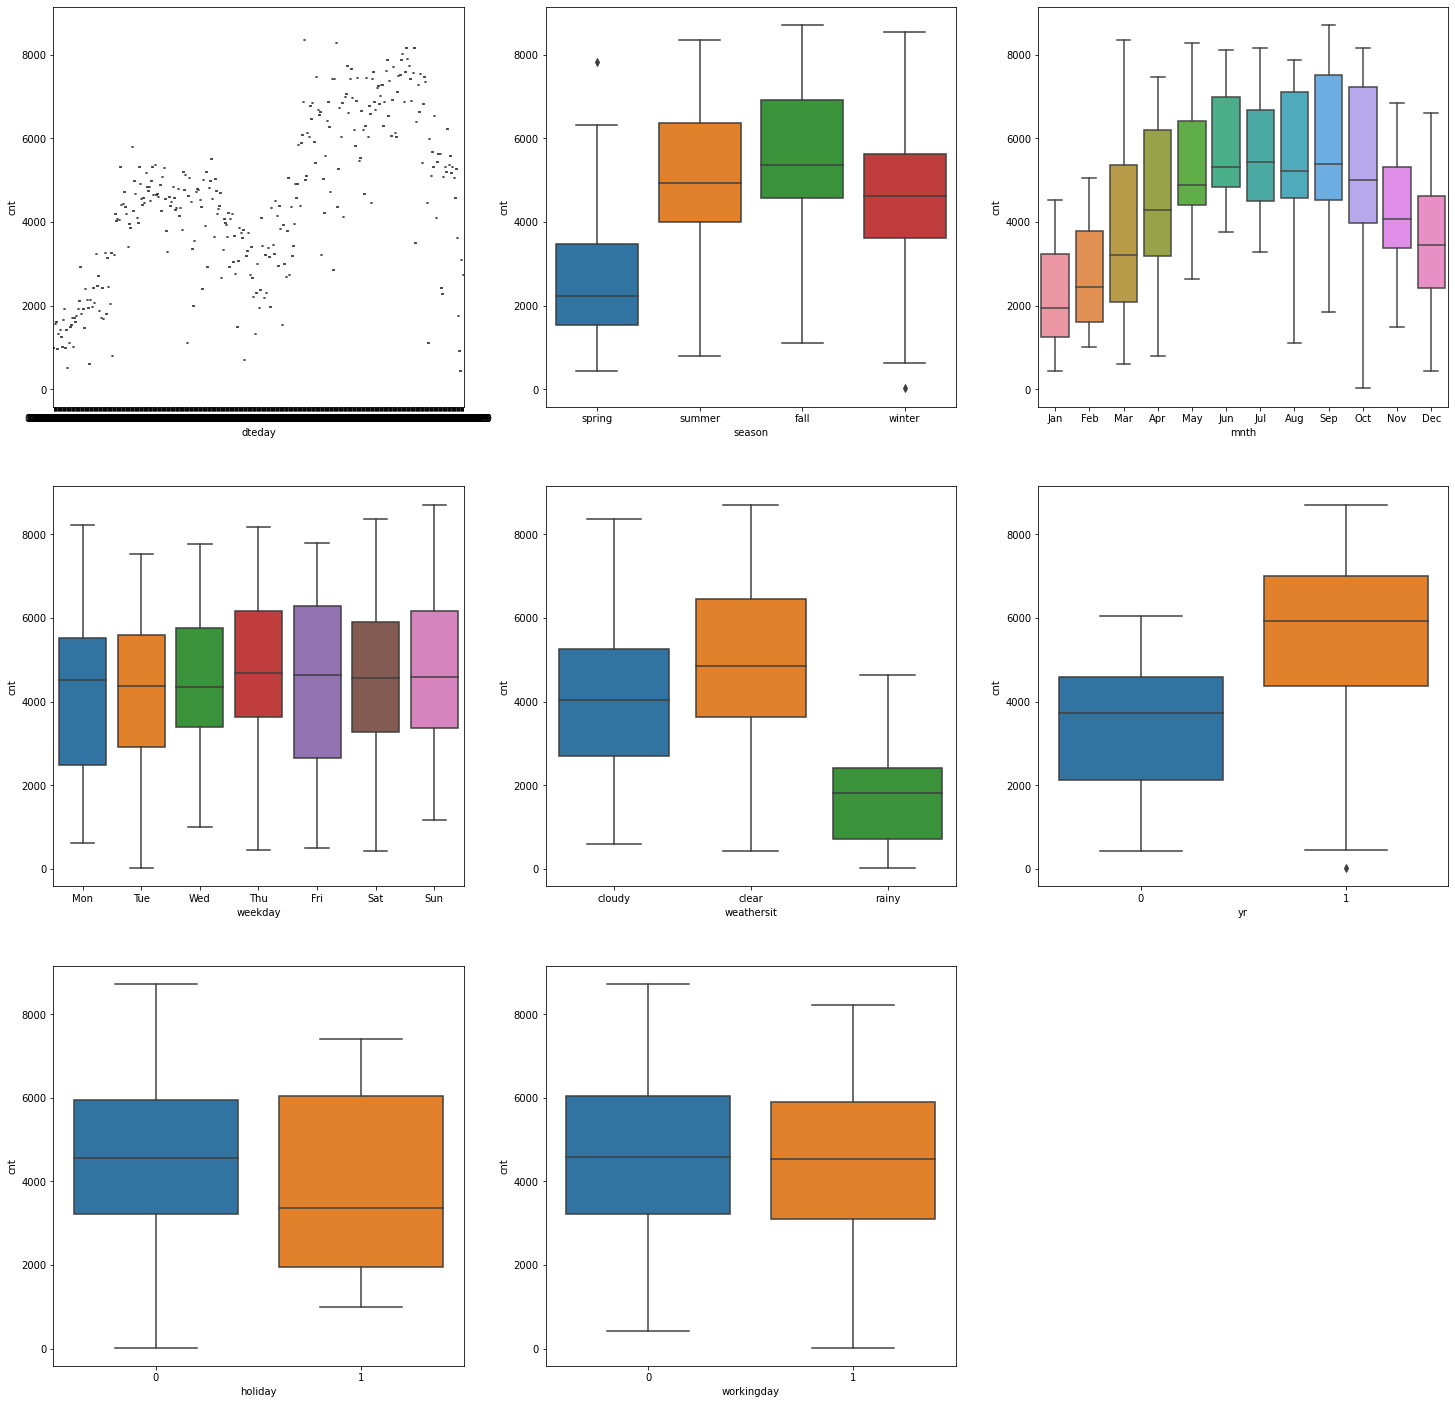

In [22]:
def plots(obj_cols):
  plt.figure(figsize=[25,25])
  for col in obj_cols:
    loc=obj_cols.index(col)+1
    plt.subplot(3,3,loc)
    sns.boxplot(x=df[col], y=df['cnt'])
  plt.show()

plots(obj_cols)

### *Inferences:*
- The average number of (median) bike users is highest in fall and it is lowest in spring
- The number of bike users has increased in 2019 than 2018.
- The number of bike users are lowest in rainy weather

## **1.4 Multivariate Analysis**

### 1.4.1 Pair Plots

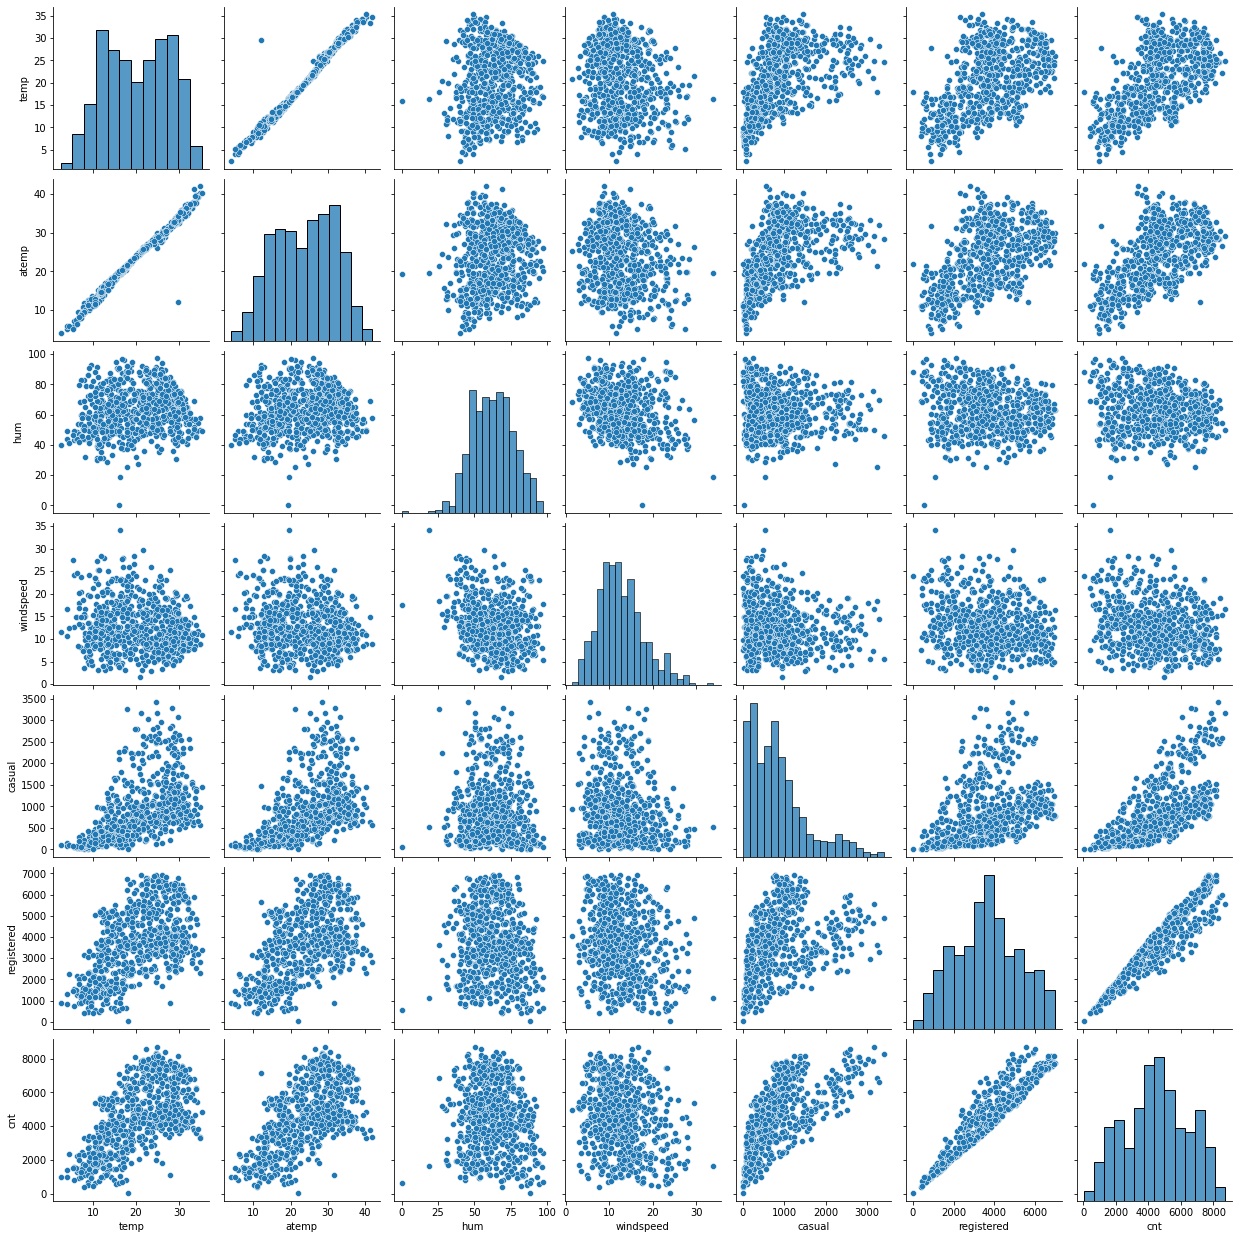

In [30]:
#Listing out the numeric columns to plot the pairplot
cols = df.select_dtypes(['int64','float64']).columns.tolist()
cols = cols[4:]

#Plotting the pairplots
sns.pairplot(df[cols])
plt.show();

### 1.4.2 Heatmap

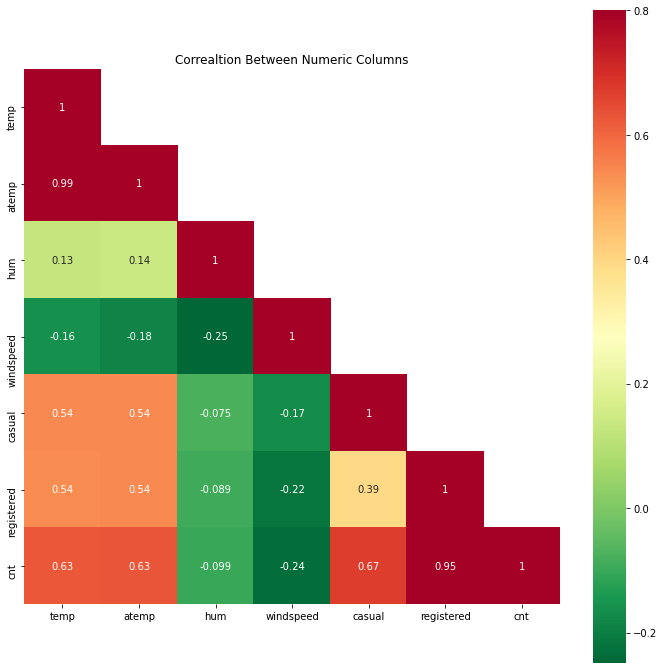

In [32]:
#Firstly, creating the correlation matrix
corr_mat = df[cols].corr()
corr_mat_mask = np.array(corr_mat)
#Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

### *Inferences:*
- temp, atemp highly correalated features
- windspeed and hum (negative) highly correalated features
- There is weak linear correalation in Registered and Casual users

# **2. Categorical Variables**

### Creating dummy variables for the columns with categorical values

Dropping columns 
- `dteday`: Dropping this columns as dates data is not required in model building


In [33]:
df.drop(labels='dteday',axis=1,inplace=True)

In [34]:
df_catg = df.select_dtypes('object')
df_catg.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

Dropping columns 
- `weathersit`, `mnth`, `weekday`, and `season` : These are the original column and it has been converted to dummy variables
- `casual`, `registered`: We have the total count of users hence dropping these columns 
- `instant` : This is  an index column and hence not required

In [35]:
df.drop(labels=['weathersit','mnth', 'weekday','season','casual','registered','instant'],axis=1,inplace=True)

In [36]:
#For the category with n levels n-1 dummy variables can be created with pd.get_dummies and avoiding 1 extra column with drop_first set to True
df_dummy = pd.get_dummies(df_catg, drop_first=True)
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#Joining the dataframe of dummy variables with original dataframe
df = pd.concat([df, df_dummy], axis=1)

Dropping columns 
- `atemp`: This column is highly correlated with `temp` temperature
- `windspped` :  This column is highly correlated with `hum` humidity


In [38]:
df.drop(labels=['atemp','hum'],axis=1,inplace=True)

In [39]:
df.head()

,yr,holiday,workingday,temp,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
0,0,0,1,14.110847,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#Spliting data to features and target variable
X = df.drop('cnt',axis=1)
y = df['cnt']

In [41]:
print('Features shape: {}, and Target Variable {}'.format(X.shape,y.shape[0]))

Features shape: (730, 27), and Target Variable 730


In [42]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
print('Features : \nTrain set shape {} \nTest set shape{}'.format(X_train.shape,X_test.shape), end='\n\n')
print('Target : \nTrain set shape {} \nTest set shape {}'.format(y_train.shape[0],y_test.shape[0]))

Features : 
Train set shape (584, 27) 
Test set shape(146, 27)

Target : 
Train set shape 584 
Test set shape 146


In [44]:
#Listing out the numeric features
num_feat = list(X_train.describe().columns)
num_feat

['yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'weathersit_cloudy',
 'weathersit_rainy']

# **3. Feature Scaling**

In [45]:
# Scaling of features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [46]:
X_train.head()

,yr,holiday,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_cloudy,weathersit_rainy
239,-0.989778,-0.167836,0.664812,1.169798,1.494191,-0.558891,-0.593171,-0.577350,3.268027,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,-0.710742,-0.156721
97,-0.989778,-0.167836,-1.504184,-0.849259,0.480773,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,1.406980,-0.156721
503,1.010327,-0.167836,-1.504184,0.587516,-1.385350,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,3.16526,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,2.456857,-0.424026,-0.409878,-0.395519,-0.710742,-0.156721
642,1.010327,-0.167836,-1.504184,0.669099,-1.093395,-0.558891,-0.593171,1.732051,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,-0.31593,-0.305995,3.16526,-0.274784,-0.404162,2.456857,-0.407024,-0.424026,-0.409878,-0.395519,-0.710742,-0.156721
498,1.010327,-0.167836,0.664812,0.442477,0.294182,-0.558891,1.685854,-0.577350,-0.305995,-0.30933,-0.278372,-0.299253,-0.292407,-0.302636,-0.312641,3.16526,-0.305995,-0.31593,-0.274784,-0.404162,-0.407024,-0.407024,-0.424026,2.439750,-0.395519,1.406980,-0.156721


# **4. Model Building**

## Model 1

In [47]:
#Now creating a linear model with sci-kit learn
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Intercept of the linear model: {}'.format(reg.intercept_),end='\n')
#printing out coefficients
coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
coeff.head()

Intercept of the linear model: 4492.518835616438


,Coefficients
yr,993.488771
holiday,-163.689280
workingday,-317.153923
temp,751.261210
windspeed,-184.880510


In [48]:
#Now , let's make predications using the linear model
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

df_result_train = pd.DataFrame({'Actual (On Train)':y_train,'Predicted (on Train)': y_pred_train})
df_result_test = pd.DataFrame({'Actual (On Test)':y_test,'Predicted (on Test)': y_pred})

print(df_result_train.head(),end='\n')
print(df_result_test.head())

     Actual (On Train)  Predicted (on Train)
239               4334           4339.509194
97                1471           2865.012368
503               8294           7129.946937
642               8156           7478.837733
498               2843           5558.491110
     Actual (On Test)  Predicted (on Test)
196              5923          4116.650375
187              4592          4851.314087
14               1248           725.992281
31               1360          1284.328600
390              4075          3717.072329


# **5. Residual Analysis**

In [49]:
#Let's check the R2
from sklearn.metrics import r2_score

R2_Train_M1 = r2_score(y_train, y_pred_train)
R2_Test_M1 = r2_score(y_test, y_pred)
                       
print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

On Train: 0.8297106634103009
On Test: 0.8728071946059206


In [50]:
#Importing the package for statistical modelling
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Creating a function to create a statsmodel
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
#creating a function to check the VIF values    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [51]:
X_train_new = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          5.10e-194
Time:                        15:34:15   Log-Likelihood:                -4717.5
No. Observations:                 584   AIC:                             9491.
Df Residuals:                     556   BIC:                             9613.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4492.5188     33.07

In [52]:
checkVIF(X_train_new)

,Features,VIF
3,workingday,54.31
21,weekday_Sat,32.09
22,weekday_Sun,31.52
6,season_spring,10.97
8,season_winter,10.88
7,season_summer,7.97
18,mnth_Oct,6.92
17,mnth_Nov,6.90
4,temp,6.81
10,mnth_Dec,5.94


In [53]:
#Importing the RFE: Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [54]:
#Checking RFE for the model
rfe = RFE(reg, 25)
rfe = rfe.fit(X_train, y_train)
ref_df = pd.DataFrame(data={'Column':X_train.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
24,weekday_Wed,True,1
23,weekday_Tue,True,1
22,weekday_Thu,True,1
21,weekday_Sun,True,1
20,weekday_Sat,True,1
19,weekday_Mon,True,1
18,mnth_Sep,True,1
17,mnth_Oct,True,1
16,mnth_Nov,True,1


## Model 2

From the above observations, we can see that `workingday` has very high VIF, hence let's drop it to see if the VIF improves for other features

In [55]:
X_train_2 = X_train.drop(labels=['workingday'],axis=1)
X_test_2 = X_test.drop(labels=['workingday'],axis=1)

reg2 = LinearRegression()
reg2.fit(X_train_2, y_train)

y_pred = reg2.predict(X_test_2)
y_pred_train = reg2.predict(X_train_2)

R2_Train_M2 = r2_score(y_train, y_pred_train)
R2_Test_M2 = r2_score(y_test, y_pred)

print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

On Train: 0.8291920076406313
On Test: 0.8743174251644121


In [56]:
X_train_new = build_model(X_train_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.14e-194
Time:                        15:34:15   Log-Likelihood:                -4718.4
No. Observations:                 584   AIC:                             9491.
Df Residuals:                     557   BIC:                             9609.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4492.5188     33.09

In [57]:
#Checking the VIF
checkVIF(X_train_new)

,Features,VIF
5,season_spring,10.97
7,season_winter,10.88
6,season_summer,7.97
17,mnth_Oct,6.90
16,mnth_Nov,6.90
3,temp,6.81
9,mnth_Dec,5.92
8,mnth_Aug,5.61
11,mnth_Jan,5.60
12,mnth_Jul,5.60


In [58]:
#Checking the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train_2, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_2.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
23,weekday_Wed,True,1
22,weekday_Tue,True,1
20,weekday_Sun,True,1
18,weekday_Mon,True,1
17,mnth_Sep,True,1
15,mnth_Nov,True,1
14,mnth_May,True,1
24,weathersit_cloudy,True,1
11,mnth_Jul,True,1


## Model 3
From the above observations with P-values and RFE, we can drop `season_summer` and  `mnth_Mar`

In [59]:
X_train_3 = X_train_2.drop(labels=['season_summer','mnth_Mar'],axis=1)
X_test_3 = X_test_2.drop(labels=['season_summer','mnth_Mar'],axis=1)

reg3 = LinearRegression()
reg3.fit(X_train_3, y_train)

y_pred = reg3.predict(X_test_3)
y_pred_train = reg3.predict(X_train_3)

R2_Train_M3 = r2_score(y_train, y_pred_train)
R2_Test_M3 = r2_score(y_test, y_pred)

print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

X_train_new = build_model(X_train_3, y_train)

On Train: 0.8291887564414129
On Test: 0.8743227469087977
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.02e-196
Time:                        15:34:15   Log-Likelihood:                -4718.4
No. Observations:                 584   AIC:                             9487.
Df Residuals:                     559   BIC:                             9596.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [60]:
checkVIF(X_train_new)

,Features,VIF
6,season_winter,8.14
3,temp,6.54
15,mnth_Oct,4.49
14,mnth_Nov,4.33
5,season_spring,4.22
8,mnth_Dec,3.13
11,mnth_Jul,2.94
7,mnth_Aug,2.62
12,mnth_Jun,2.46
10,mnth_Jan,2.46


In [61]:
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train_3, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_3.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
21,weekday_Wed,True,1
20,weekday_Tue,True,1
18,weekday_Sun,True,1
16,weekday_Mon,True,1
15,mnth_Sep,True,1
13,mnth_Nov,True,1
12,mnth_May,True,1
22,weathersit_cloudy,True,1
10,mnth_Jul,True,1


## Model 4

From the above observations with P-values and RFE, we can drop `mnth_Oct`, `mnth_Jun` and `weekday_Thu` 

In [62]:
X_train_4 = X_train_3.drop(labels=['mnth_Oct','mnth_Jun','weekday_Thu'],axis=1)
X_test_4 = X_test_3.drop(labels=['mnth_Oct','mnth_Jun','weekday_Thu'],axis=1)

reg4 = LinearRegression()
reg4.fit(X_train_4, y_train)

y_pred = reg4.predict(X_test_4)
y_pred_train = reg4.predict(X_train_4)

R2_Train_M4 = r2_score(y_train, y_pred_train)
R2_Test_M4 = r2_score(y_test, y_pred)

print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

X_train_new = build_model(X_train_4, y_train)

On Train: 0.829111842275516
On Test: 0.8741898600949748
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          8.06e-200
Time:                        15:34:16   Log-Likelihood:                -4718.5
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     562   BIC:                             9577.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [63]:
#Checking the VIF
checkVIF(X_train_new)

,Features,VIF
3,temp,4.19
5,season_spring,3.87
6,season_winter,2.54
10,mnth_Jan,2.23
9,mnth_Feb,1.93
13,mnth_Nov,1.78
11,mnth_Jul,1.69
8,mnth_Dec,1.62
7,mnth_Aug,1.55
12,mnth_May,1.35


In [64]:
#Checking the RFE
rfe = RFE(reg, 18)
rfe = rfe.fit(X_train_4, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_4.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
18,weekday_Wed,True,1
17,weekday_Tue,True,1
14,weekday_Mon,True,1
13,mnth_Sep,True,1
12,mnth_Nov,True,1
11,mnth_May,True,1
19,weathersit_cloudy,True,1
9,mnth_Jan,True,1
10,mnth_Jul,True,1


## Model 5

From P values and RFE we can drop `mnth_Aug`, `weekday_Sat`

In [65]:
X_train_5 = X_train_4.drop(labels=['mnth_Aug','weekday_Sat'],axis=1)
X_test_5 = X_test_4.drop(labels=['mnth_Aug','weekday_Sat'],axis=1)

reg5 = LinearRegression()
reg5.fit(X_train_5, y_train)

y_pred = reg5.predict(X_test_5)
y_pred_train = reg5.predict(X_train_5)

R2_Train_M5 = r2_score(y_train, y_pred_train)
R2_Test_M5 = r2_score(y_test, y_pred)

print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

X_train_new = build_model(X_train_5, y_train)

On Train: 0.8286330536931038
On Test: 0.8752123900368938
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.23e-201
Time:                        15:34:16   Log-Likelihood:                -4719.4
No. Observations:                 584   AIC:                             9479.
Df Residuals:                     564   BIC:                             9566.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [66]:
#Checking the RFE
rfe = RFE(reg, 15)
rfe = rfe.fit(X_train_5, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_5.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
15,weekday_Tue,True,1
13,weekday_Mon,True,1
12,mnth_Sep,True,1
11,mnth_Nov,True,1
17,weathersit_cloudy,True,1
8,mnth_Jan,True,1
9,mnth_Jul,True,1
6,mnth_Dec,True,1
5,season_winter,True,1


In [67]:
#Checking the VIF
checkVIF(X_train_new)

,Features,VIF
5,season_spring,3.85
3,temp,3.56
6,season_winter,2.43
9,mnth_Jan,2.19
8,mnth_Feb,1.92
12,mnth_Nov,1.76
7,mnth_Dec,1.59
10,mnth_Jul,1.38
11,mnth_May,1.20
17,weekday_Wed,1.17


## Model 6

From P values and RFE we can drop `mnth_May`, `weekday_Sun`,`weekday_Wed`

In [68]:
X_train_6 = X_train_5.drop(labels=['mnth_May','weekday_Sun','weekday_Wed'],axis=1)
X_test_6 = X_test_5.drop(labels=['mnth_May','weekday_Sun','weekday_Wed'],axis=1)

reg6 = LinearRegression()
reg6.fit(X_train_6, y_train)

y_pred = reg6.predict(X_test_6)
y_pred_train = reg6.predict(X_train_6)

R2_Train_M6 = r2_score(y_train, y_pred_train)
R2_Test_M6 = r2_score(y_test, y_pred)

print('On Train:',r2_score(y_train, y_pred_train))
print('On Test:',r2_score(y_test, y_pred))

X_train_new = build_model(X_train_6, y_train)

On Train: 0.8263194743132011
On Test: 0.876075429737612
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          2.51e-203
Time:                        15:34:16   Log-Likelihood:                -4723.3
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     567   BIC:                             9555.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [69]:
#Checking the RFE
rfe = RFE(reg, 15)
rfe = rfe.fit(X_train_6, y_train)
ref_df = pd.DataFrame(data={'Column':X_train_6.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
ref_df.sort_values(by=['Rank'],ascending=True)

,Column,RFE,Rank
0,yr,True,1
2,temp,True,1
3,windspeed,True,1
4,season_spring,True,1
5,season_winter,True,1
6,mnth_Dec,True,1
7,mnth_Feb,True,1
8,mnth_Jan,True,1
9,mnth_Jul,True,1
10,mnth_Nov,True,1


In [70]:
##Checking the VIF
checkVIF(X_train_new)

,Features,VIF
5,season_spring,3.71
3,temp,3.55
6,season_winter,2.29
9,mnth_Jan,2.19
8,mnth_Feb,1.92
11,mnth_Nov,1.76
7,mnth_Dec,1.59
10,mnth_Jul,1.32
4,windspeed,1.10
12,mnth_Sep,1.09


# **6. Performance Analysis**

In [71]:
R2_Trains = [R2_Train_M1,R2_Train_M2,R2_Train_M3,R2_Train_M4,R2_Train_M5,R2_Train_M6]
R2_Tests = [R2_Test_M1,R2_Test_M2,R2_Test_M3,R2_Test_M4,R2_Test_M5,R2_Test_M6,]

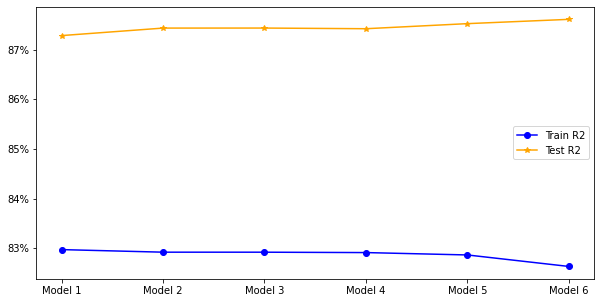

In [72]:
plt.figure(figsize=[10,5])
plt.yticks([0.83,0.84,0.85,0.86,0.87,0.88],['83%','84%','85%','86%','87%','88%'])
plt.plot(R2_Trains, color='Blue', label="Train R2", marker='o')
plt.plot(R2_Tests, color='Orange', label='Test R2', marker='*')
plt.xticks([0,1,2,3,4,5],['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6'])
plt.legend()
plt.show()

In [73]:
coeff = pd.DataFrame(X_train_6.columns,reg6.coef_, columns=['Coefficients'])
coeff.head()

,Coefficients
999.462980,yr
-78.926450,holiday
731.980483,temp
-189.983241,windspeed
-363.519385,season_spring


In [74]:
line =  pd.DataFrame({'Coeff':reg6.coef_,'Columns':X_train_6.columns.to_list()})
line['Coeff'] = line['Coeff'].astype(str)
line['Eq'] =  '('+line['Coeff']+') * '+line['Columns']


print('Equation of the linear regression model is:',reg6.intercept_,'+',' + '.join(line['Eq']))

Equation of the linear regression model is: 4492.518835616438 + (999.4629797197938) * yr + (-78.92645003359428) * holiday + (731.9804830480718) * temp + (-189.98324131868992) * windspeed + (-363.51938538908803) * season_spring + (239.78799678586648) * season_winter + (-172.10397134380744) * mnth_Dec + (-115.59436216053027) * mnth_Feb + (-175.18504131132033) * mnth_Jan + (-130.17515795335072) * mnth_Jul + (-183.3770840453766) * mnth_Nov + (102.00166453140788) * mnth_Sep + (-102.85777992193096) * weekday_Mon + (-98.27984835259693) * weekday_Tue + (-323.5624858984102) * weathersit_cloudy + (-366.20879930075165) * weathersit_rainy


# **7. Conclusion**

For BoomBikes to increase the number of bike users below are few significant points to note:

- Users wouldl use the bikes more when the weather is not rainy
- Users would be be using bikes more in Nov, Dec and Jan 
- Users are prefer to use bikes in Winter than in Spring
- There is insignificant difference on bike usage on working day or weekend.

# **8. Assupmtions of Multiple Linear Regression**

#### 8.1 Multicollinearlity: : Observations are independent of each other.

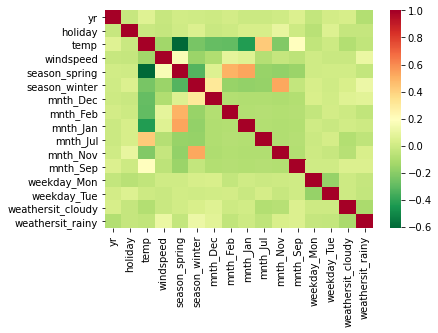

In [78]:
sns.heatmap(X_train_6.corr(), cmap='RdYlGn_r')

#### 8.2 The distribution of errors follow the normal curve. 

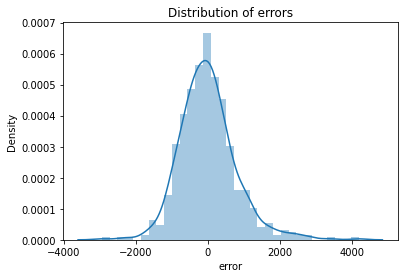

In [85]:
#Let's calculate the error
error = y_pred_train - y_train
#Now, Plot the distribution 
sns.distplot(error).set(xlabel='error',title='Distribution of errors')
plt.show()

#### 8.3 Error terms are independent of each other

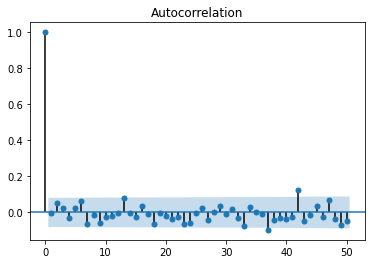

In [131]:
#We need to plot the autocorrelation of the errors to see whether there independent or not
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(error, lags=50 , alpha=0.05, )
acf.show()

From the above graph we can see the error terms have around 0 autocorrelation

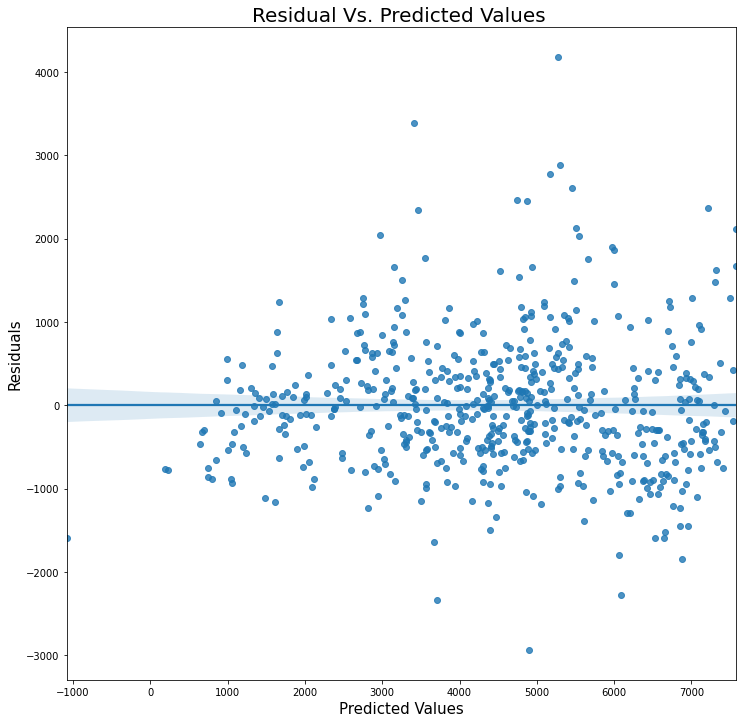

In [167]:
plt.figure(figsize=[12,12])
sns.regplot(x=y_pred_train, y=error)
plt.title('Residual Vs. Predicted Values ', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

Also, from the scatterplot we confirm there is no visible relation in error terms

#### 8.4 homoscedasticity: Error terms have constant variance

In [154]:
err_mean = round(np.mean(error),4)
err_mean

-0.0

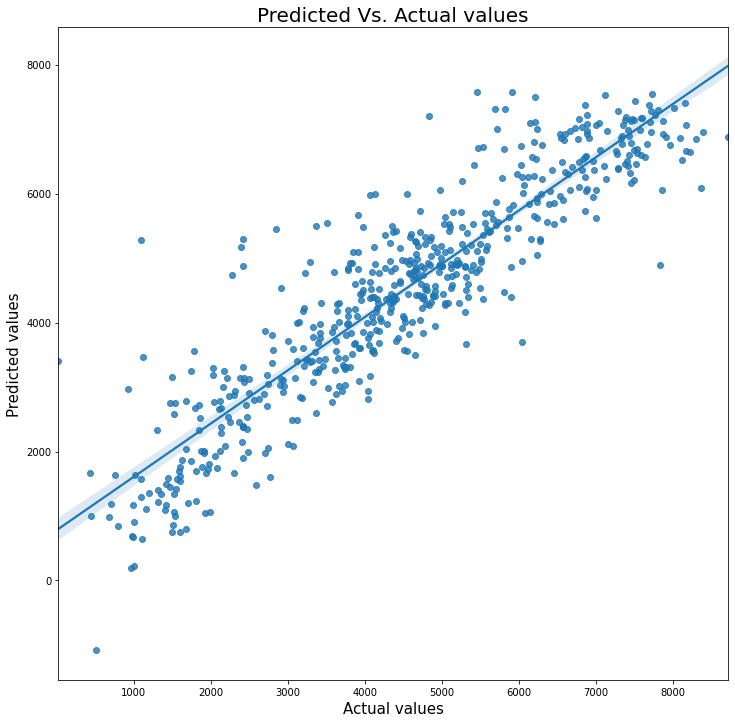

In [159]:
plt.figure(figsize=[12,12])
sns.regplot(x=y_train, y=y_pred_train)
plt.title('Predicted Vs. Actual values', fontdict={'fontsize': 20})
plt.xlabel('Actual values', fontdict={'fontsize': 15})
plt.ylabel('Predicted values', fontdict={'fontsize': 15})
plt.show()